In [9]:
# Import the packages

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

## Import the dataset 

In [11]:
df = pd.read_excel(r'C:\Users\Connie Wu\Desktop\Log\Log- 2021-05-27.xlsx',sheet_name = 'LOG')
df.head()

,Admin,Ver.,Partial,Date,INT/US,Order Type,Order Qty
0,demon,Ver.05.17,NaN,2019-05-17 11:13:13,INT ORDERS,Bimake,1.0
1,demon,Ver.05.17,NaN,2019-05-17 13:03:09,US ORDERS,Selleck,17.0
2,demon,Ver.05.17,NaN,2019-05-17 15:23:36,US ORDERS,Selleck,39.0
3,demon,Ver.05.17,NaN,2019-05-17 15:30:52,INT ORDERS,Selleck,1.0
4,demon,Ver.05.17,NaN,2019-05-20 09:38:36,US ORDERS,Selleck,32.0


In [12]:
# There are 4756 rows and 7 columns in the dataset 

df.shape

(4756, 7)

In [13]:
# the useful information were on the columns of 'Date', 'INT/US','Order Type','Order Qty', so subset the columns mentioned. 

df = df[['Date', 'INT/US','Order Type','Order Qty']]
df

,Date,INT/US,Order Type,Order Qty
0,2019-05-17 11:13:13,INT ORDERS,Bimake,1.0
1,2019-05-17 13:03:09,US ORDERS,Selleck,17.0
2,2019-05-17 15:23:36,US ORDERS,Selleck,39.0
3,2019-05-17 15:30:52,INT ORDERS,Selleck,1.0
4,2019-05-20 09:38:36,US ORDERS,Selleck,32.0
...,...,...,...,...
4751,2021-05-27 09:07:17,US ORDERS,Selleck,41.0
4752,2021-05-27 09:21:23,INT ORDERS,Selleck,1.0
4753,2021-05-27 09:35:16,INT ORDERS,Selleck,2.0
4754,2021-05-27 10:28:37,US ORDERS,Bimake,1.0


## Selleck Order 

In [14]:
# subset the dataset only containing the order Type of "Selleck", there are total 4099 times order processing of 'Selleck'
df_selleck = df[df['Order Type']=='Selleck']
df_selleck.shape

(4099, 4)

In [17]:
# count how many time the shipping department would process the order in one day

df_selleck['Order Qty'].groupby(df['Date'].dt.to_period('D')).count()

Date
2019-05-17     3
2019-05-20     5
2019-05-21     4
2019-05-22     8
2019-05-23     5
              ..
2021-05-21    11
2021-05-24    10
2021-05-25    10
2021-05-26     9
2021-05-27     4
Freq: D, Name: Order Qty, Length: 509, dtype: int64

### Plot show how many times that the shipping department would process the order in one day. Generally speaking, there is a slightly increased trends. The most two lowest points in the plots were around Christmas. 

###  每天的做单次数

<AxesSubplot:title={'center':'The times processing order everyday'}, xlabel='Date'>

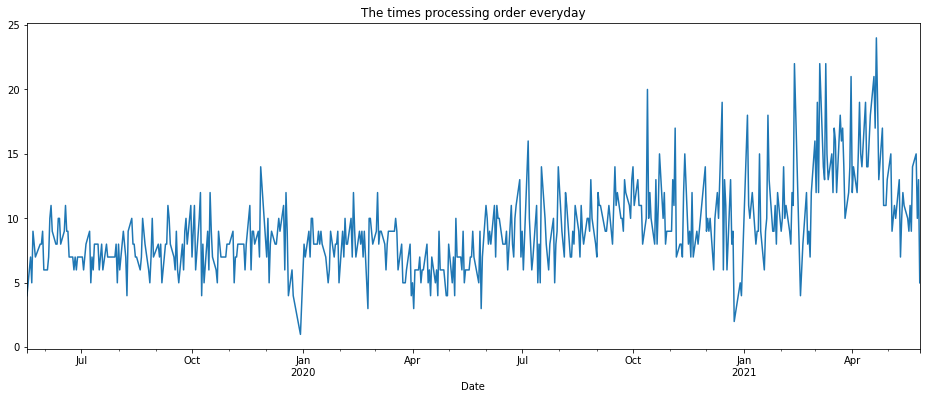

In [43]:

df['Order Qty'].groupby(df['Date'].dt.to_period('D')).count().plot(figsize=(16,6),title = 'The times processing order everyday')

### Around the Apr2020 to Jun2020, the sum of order processed decrease due to in the beginning of Covi-19, but the number of  the order recover on Jul 2020 and one of the day in Jul 2020 reached to 300. Meanwhile, there are two lowest point around thanksgiving and Christmas holiday on 2019 and 2020.

### 每一天的收到的订单数量

<AxesSubplot:title={'center':'The number of orders receiving everyday'}, xlabel='Date'>

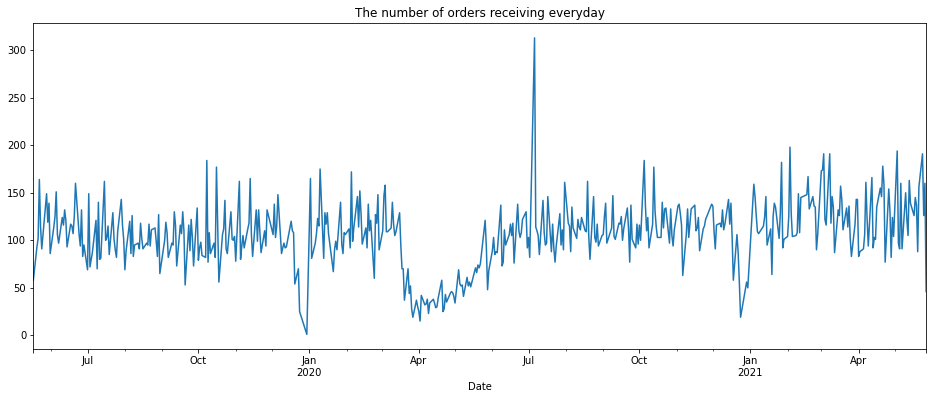

In [42]:

df['Order Qty'].groupby(df['Date'].dt.to_period('D')).sum().plot(figsize=(16,6),title = 'The number of orders receiving everyday')

### The below barplot shows how many times the order had been processed in the shipping department each week. 
### Shipping department 每周的做单数量

<AxesSubplot:xlabel='Date'>

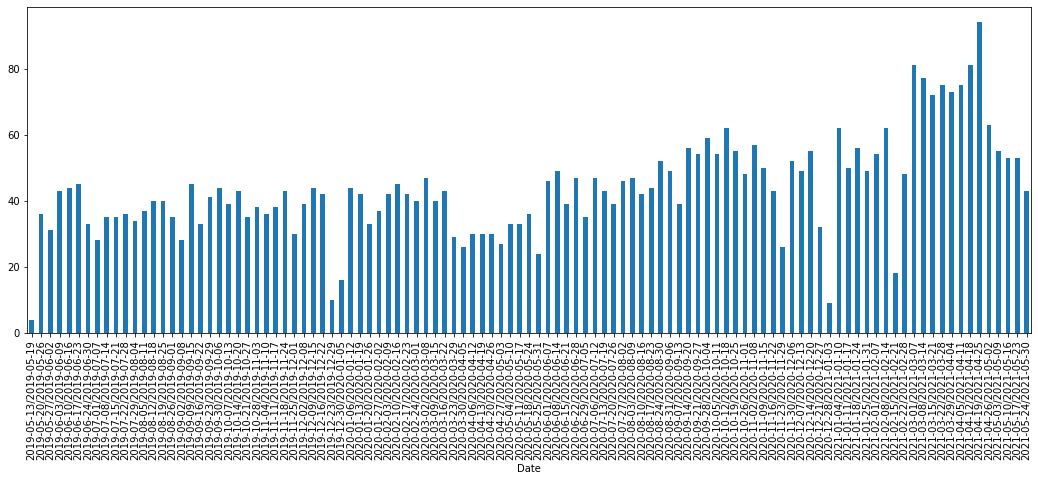

In [33]:

df['Order Qty'].groupby(df['Date'].dt.to_period('W')).count().plot(kind='bar',figsize=(18,6))

### The below barplot shows how many times the order had been processed in the shipping department each month. There are two peaks on Mar 2021 and Apr 2021. 
### Shipping department 每月的做单数量

<AxesSubplot:xlabel='Date'>

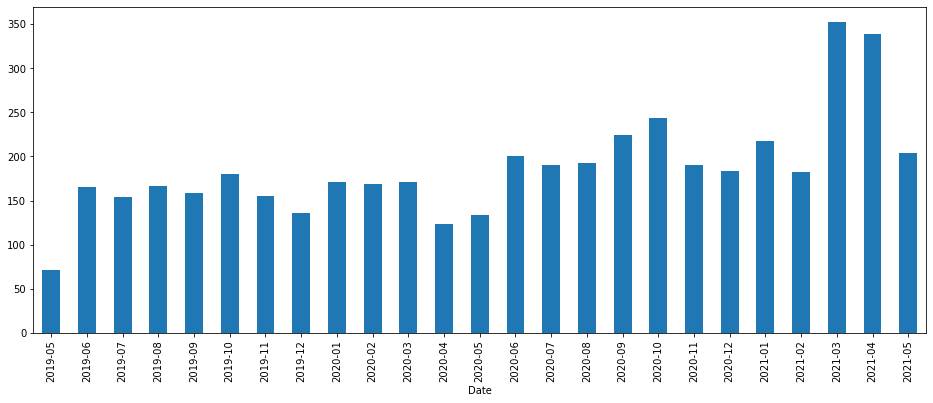

In [29]:

df['Order Qty'].groupby(df['Date'].dt.to_period('M')).count().plot(kind='bar',figsize=(16,6))

### The below barplot shows the number of order receiving in the shipping department 
### 每个月的收到的订单数量 

<AxesSubplot:xlabel='Date'>

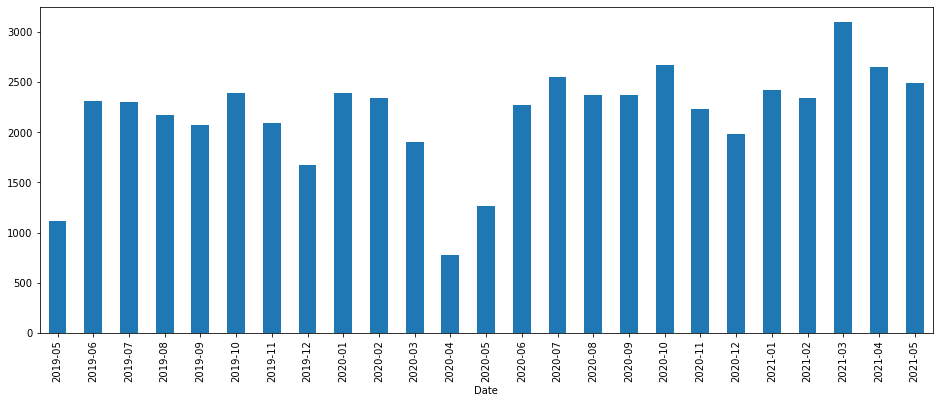

In [26]:
df['Order Qty'].groupby(df['Date'].dt.to_period('M')).sum().plot(kind='bar',figsize=(16,6))

## Bimake 

In [34]:
df_bimake = df[df['Order Type']=='Bimake']
df_bimake

,Date,INT/US,Order Type,Order Qty
0,2019-05-17 11:13:13,INT ORDERS,Bimake,1.0
5,2019-05-20 10:05:05,US ORDERS,Bimake,5.0
8,2019-05-20 14:16:14,US ORDERS,Bimake,1.0
13,2019-05-21 13:39:30,US ORDERS,Bimake,3.0
21,2019-05-22 13:58:07,US ORDERS,Bimake,4.0
...,...,...,...,...
4741,2021-05-26 10:54:21,US ORDERS,Bimake,8.0
4742,2021-05-26 11:04:06,US ORDERS,Bimake,1.0
4743,2021-05-26 11:07:17,INT ORDERS,Bimake,1.0
4744,2021-05-26 11:25:54,INT ORDERS,Bimake,1.0


### The below barplot shows the number the order receiving per month in Bimake brand 

<AxesSubplot:xlabel='Date'>

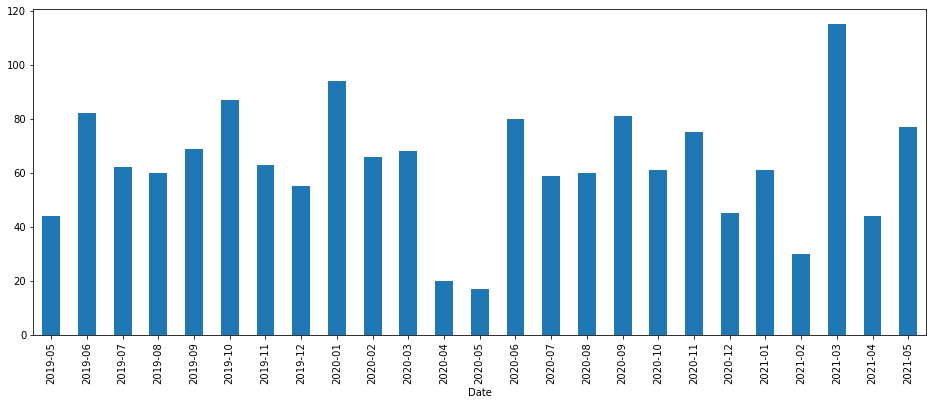

In [37]:
df_bimake['Order Qty'].groupby(df_bimake['Date'].dt.to_period('M')).sum().plot(kind='bar',figsize=(16,6))

In [39]:
import asyncio
from pyppeteer import 

SyntaxError: invalid syntax (<ipython-input-39-4442babab2ca>, line 2)